# ChemInformant User Manual

Welcome to `ChemInformant`! This manual will guide you through a journey from basic queries to advanced data analysis workflows, fully demonstrating how this library simplifies your interaction with the PubChem database.

### Core Features at a Glance

- **Analysis-Ready**: Core functions return clean Pandas DataFrames, ready for immediate analysis.
- **Out-of-the-Box Robustness**: Comes with built-in caching, smart rate-limiting, and automatic retries, requiring zero configuration.
- **Dual-Layer API**: Offers simple convenience functions for quick lookups and a powerful engine for high-performance batch operations.

### Guide Overview

1.  [**Installation & Setup**](#Installation-&-Setup)
2.  [**Quick Start: Master the Core in Five Minutes**](#Quick-Start:-Master-the-Core-in-Five-Minutes)
3.  [**The Convenience API: The Art of Quick Lookups**](#The-Convenience-API:-The-Art-of-Quick-Lookups)
4.  [**Batch Data Retrieval & Analysis**](#Batch-Data-Retrieval-&-Analysis)
5.  [**Advanced Applications: Solving Real-World Problems**](#Advanced-Applications:-Solving-Real-World-Problems)
6.  [**Data Export: Sharing Your Results**](#Data-Export:-Sharing-Your-Results)

## Installation & Setup

First, ensure you have ChemInformant installed. To run all examples in this manual, we recommend installing it with the `plot` and analysis extras.

In [1]:
# Run the following command in your terminal:
#!pip install "ChemInformant[all]"

In [2]:
# Import all necessary libraries
import ChemInformant as ci
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.display import display, Image

# Configure display options for the best visualization experience
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)
sns.set_theme(style="whitegrid", context="talk")

print(f"ChemInformant loaded successfully!")

ChemInformant loaded successfully!


## Quick Start: Master the Core in Five Minutes

The most powerful feature of `ChemInformant` is the `get_properties` function. It allows you to go from a list of compound names to an analysis-ready data table in a single line of code.

### 🎯 Smart Default Behavior

By default, `get_properties` returns the most commonly needed chemical properties including **molecular identifiers** (CAS, synonyms), **basic descriptors** (molecular weight, formula), **structural representations** (SMILES), and **key drug-discovery parameters** (LogP, TPSA, hydrogen bonding). This means you get comprehensive chemical information without specifying every property!

In [3]:

# --- Test Data ---
identifiers = ["aspirin", "caffeine"]
print(f"Testing with identifiers: {identifiers}")

# ==============================================================================
# 1. Default Mode (Core Properties)
# ==============================================================================
print("\n--- 1. Default Mode (Core Properties) ---")
print("Calling: ci.get_properties(identifiers)")

# No property arguments are given, so it returns the default set of core properties.
df_core = ci.get_properties(identifiers)
print("✅ Success! Returns the default set of the most common 2D properties.")
print(df_core)


# ==============================================================================
# 2. Include 3D Mode
# ==============================================================================
print("\n--- 2. Include 3D Mode ---")
print("Calling: ci.get_properties(identifiers, include_3d=True)")

# The include_3d=True flag adds all 3D properties to the default core set.
df_3d = ci.get_properties(identifiers, include_3d=True)
print("✅ Success! Returns the Core Properties PLUS all 3D properties.")
print(df_3d)


# ==============================================================================
# 3. All Properties Mode
# ==============================================================================
print("\n--- 3. All Properties Mode ---")
print("Calling: ci.get_properties(identifiers, all_properties=True)")

# The all_properties=True flag fetches every single available standard property.
df_all = ci.get_properties(identifiers, all_properties=True)
print(f"✅ Success! Returns all {len(df_all.columns) - 3} available standard properties.")
print(df_all)


# ==============================================================================
# 4. Custom Properties Mode
# ==============================================================================
print("\n--- 4. Custom Properties Mode (using aliases) ---")
custom_properties = ["molecular_weight", "tpsa", "volume3d", "charge"]
print(f"Calling: ci.get_properties(identifiers, properties={custom_properties})")

# Providing a list to the 'properties' parameter retrieves only those specific properties.
# This mode overrides 'include_3d' and 'all_properties'.
df_custom = ci.get_properties(identifiers, properties=custom_properties)
print("✅ Success! Returns only the specific properties requested.")
print(df_custom)


Testing with identifiers: ['aspirin', 'caffeine']

--- 1. Default Mode (Core Properties) ---
Calling: ci.get_properties(identifiers)
✅ Success! Returns the default set of the most common 2D properties.
  input_identifier   cid status  atom_stereo_count  bond_stereo_count              canonical_smiles      cas  charge  \
0          aspirin  2244     OK                  0                  0      CC(=O)OC1=CC=CC=C1C(=O)O  50-78-2       0   
1         caffeine  2519     OK                  0                  0  CN1C=NC2=C1C(=O)N(C(=O)N2C)C  58-08-2       0   

   complexity  covalent_unit_count    exact_mass  h_bond_acceptor_count  h_bond_donor_count  heavy_atom_count  \
0         212                    1  180.04225873                      4                   1                13   
1         293                    1  194.08037557                      3                   0                14   

                                             in_ch_i                  in_ch_i_key               i

## The Convenience API: The Art of Quick Lookups

For everyday, quick lookups of single properties, ChemInformant provides a series of clearly named convenience functions.

### 3.1 Using Convenience Functions

These functions follow the intuitive `get_<property>()` pattern.

Molecular weight : 206.28 g/mol
Formula          : C13H18O2
CAS RN           : 15687-27-1
IUPAC name       : 2-[4-(2-methylpropyl)phenyl]propanoic acid
LogP (XLogP)     : 3.5

Canonical SMILES : CC(C)CC1=CC=C(C=C1)C(C)C(=O)O
Common names     : 58560-75-1, IBUPROFEN, (+-)-, ibuprofen...

🎨 2-D structure (will open in a new window):


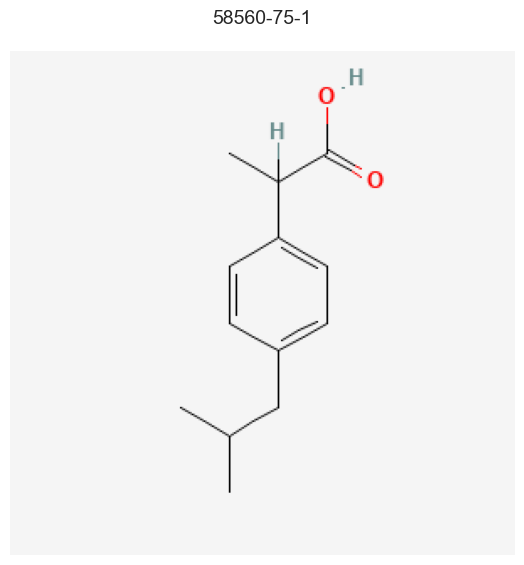

✅ Structure displayed! (Close the window to continue)

📊 Additional info:
  PubChem CID  : 3672
  PubChem URL  : https://pubchem.ncbi.nlm.nih.gov/compound/3672


In [4]:
compound = "ibuprofen"

# Basic properties
print(f"Molecular weight : {ci.get_weight(compound)} g/mol")
print(f"Formula          : {ci.get_formula(compound)}")
print(f"CAS RN           : {ci.get_cas(compound)}")
print(f"IUPAC name       : {ci.get_iupac_name(compound)}")
print(f"LogP (XLogP)     : {ci.get_xlogp(compound)}")

# SMILES
print(f"\nCanonical SMILES : {ci.get_canonical_smiles(compound)}")

# Synonyms (common names)
synonyms = ci.get_synonyms(compound)
print(f"Common names     : {', '.join(synonyms[:3])}..." if len(synonyms) > 3 else f"Common names     : {', '.join(synonyms)}")

# 2-D structure visualization
print("\n🎨 2-D structure (will open in a new window):")
ci.draw_compound(compound)          
print("✅ Structure displayed! (Close the window to continue)")

# Compound object for additional metadata
obj = ci.get_compound(compound)
print(f"\n📊 Additional info:")
print(f"  PubChem CID  : {obj.cid}")
print(f"  PubChem URL  : {obj.pubchem_url}")

### 3.2 Enhanced Alias Support

ChemInformant now supports intuitive aliases for commonly used properties, making queries more natural and user-friendly.


In [5]:
# Example: Using intuitive aliases for hydrogen bonding properties
compound = "aspirin"
print("🔗 Hydrogen bonding properties using friendly aliases:")

# These aliases make the code more readable and intuitive
result = ci.get_properties([compound], [
    "hbond_donor_count",     # Alias for h_bond_donor_count
    "hbond_acceptor_count",  # Alias for h_bond_acceptor_count  
    "rotatable_bonds",       # Alias for rotatable_bond_count
    "molecular_weight",      # Standard name
    "smiles"                # Alias for canonical_smiles
])

display(result[['input_identifier', 'h_bond_donor_count', 'h_bond_acceptor_count', 'rotatable_bond_count', 'molecular_weight', 'canonical_smiles']])
print("✅ All aliases resolved automatically to their standard property names!")


🔗 Hydrogen bonding properties using friendly aliases:


,input_identifier,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,molecular_weight,canonical_smiles
0,aspirin,1,4,3,180.16,CC(=O)OC1=CC=CC=C1C(=O)O


✅ All aliases resolved automatically to their standard property names!


### 3.3 Support for Multiple Identifier Types

All convenience and core functions support various types of inputs. ChemInformant resolves them for you automatically in the background.

In [6]:
# Support for Name, CID, SMILES, etc.
test_identifiers = [
    "aspirin",                        # Common Name
    "acetylsalicylic acid",           # Chemical Name
    2244,                             # PubChem CID
    "CC(=O)OC1=CC=CC=C1C(=O)O"        # SMILES String
]

results = ci.get_properties(test_identifiers, ['molecular_weight'])

print("Query results for different identifier types:")
display(results[['input_identifier', 'cid', 'molecular_weight', 'status']])

Query results for different identifier types:


,input_identifier,cid,molecular_weight,status
0,aspirin,2244,180.16,OK
1,acetylsalicylic acid,2244,180.16,OK
2,2244,2244,180.16,OK
3,CC(=O)OC1=CC=CC=C1C(=O)O,2244,180.16,OK


## Batch Data Retrieval & Analysis

The true power of `get_properties` shines when you need to process a large number of compounds.

In [7]:
# 1. Define a list of 12 common drugs
drugs = [
    "aspirin", "ibuprofen", "paracetamol", "naproxen",
    "penicillin", "amoxicillin", "ciprofloxacin",
    "lisinopril", "amlodipine", "metoprolol",
    "atorvastatin", "simvastatin"
]

# 2. Option A: Use smart defaults (recommended for comprehensive analysis)
print("🎯 Using smart defaults - gets all essential properties automatically:")
df_default = ci.get_properties(drugs)
print(f"✅ Retrieved {df_default.shape[1]} properties for {len(drugs)} compounds")
print(f"   Includes: molecular identifiers, basic descriptors, SMILES, drug-discovery parameters")
print(f"   Success rate: {len(df_default[df_default['status'] == 'OK'])}/{len(drugs)} compounds")

# Show key columns
key_columns = ['input_identifier', 'molecular_weight', 'molecular_formula', 'cas', 'canonical_smiles', 'tpsa', 'xlogp', 'h_bond_donor_count']
display(df_default[key_columns].head())

print("\n" + "="*80)

# 2. Option B: Custom property selection (if you need specific properties only)
props = [
    "molecular_weight", "molecular_formula", "canonical_smiles", 
    "xlogp", "tpsa", "hbond_donor_count", "hbond_acceptor_count",  # Using friendly aliases
    "iupac_name", "cas", "synonyms"
]

print("🎨 Using custom properties with friendly aliases:")
df_custom = ci.get_properties(drugs, props)
print(f"✅ Custom query completed: {len(df_custom[df_custom['status'] == 'OK'])}/{len(drugs)} compounds")

# We'll use the default dataset for further analysis as it's more comprehensive
df_bulk = df_default

🎯 Using smart defaults - gets all essential properties automatically:
✅ Retrieved 25 properties for 12 compounds
   Includes: molecular identifiers, basic descriptors, SMILES, drug-discovery parameters
   Success rate: 12/12 compounds


,input_identifier,molecular_weight,molecular_formula,cas,canonical_smiles,tpsa,xlogp,h_bond_donor_count
0,aspirin,180.16,C9H8O4,50-78-2,CC(=O)OC1=CC=CC=C1C(=O)O,63.6,1.2,1
1,ibuprofen,206.28,C13H18O2,15687-27-1,CC(C)CC1=CC=C(C=C1)C(C)C(=O)O,37.3,3.5,1
2,paracetamol,151.16,C8H9NO2,103-90-2,CC(=O)NC1=CC=C(C=C1)O,49.3,0.5,2
3,naproxen,230.26,C14H14O3,22204-53-1,CC(C1=CC2=C(C=C1)C=C(C=C2)OC)C(=O)O,46.5,3.3,1
4,penicillin,334.4,C16H18N2O4S,1406-05-9,CC1(C(N2C(S1)C(C2=O)NC(=O)CC3=CC=CC=C3)C(=O)O)C,112.0,1.8,2



🎨 Using custom properties with friendly aliases:
✅ Custom query completed: 12/12 compounds


### Data Analysis and Visualization

The returned DataFrame can be directly fed into data analysis and visualization pipelines.

📊 Successfully prepared data for 12 compounds
   Available core properties: 22

📈 Descriptive Statistics of Key Drug Properties:


,molecular_weight,xlogp,tpsa,h_bond_donor_count
count,12.00,12.00,12.00,12.00
mean,321.50,1.58,84.00,2.17
std,119.11,2.55,38.45,1.19
min,151.16,-2.90,37.30,1.00
25%,224.26,0.10,50.35,1.00
50%,332.87,1.85,72.85,2.00
75%,406.35,3.35,112.00,2.50
max,558.60,5.00,158.00,4.00


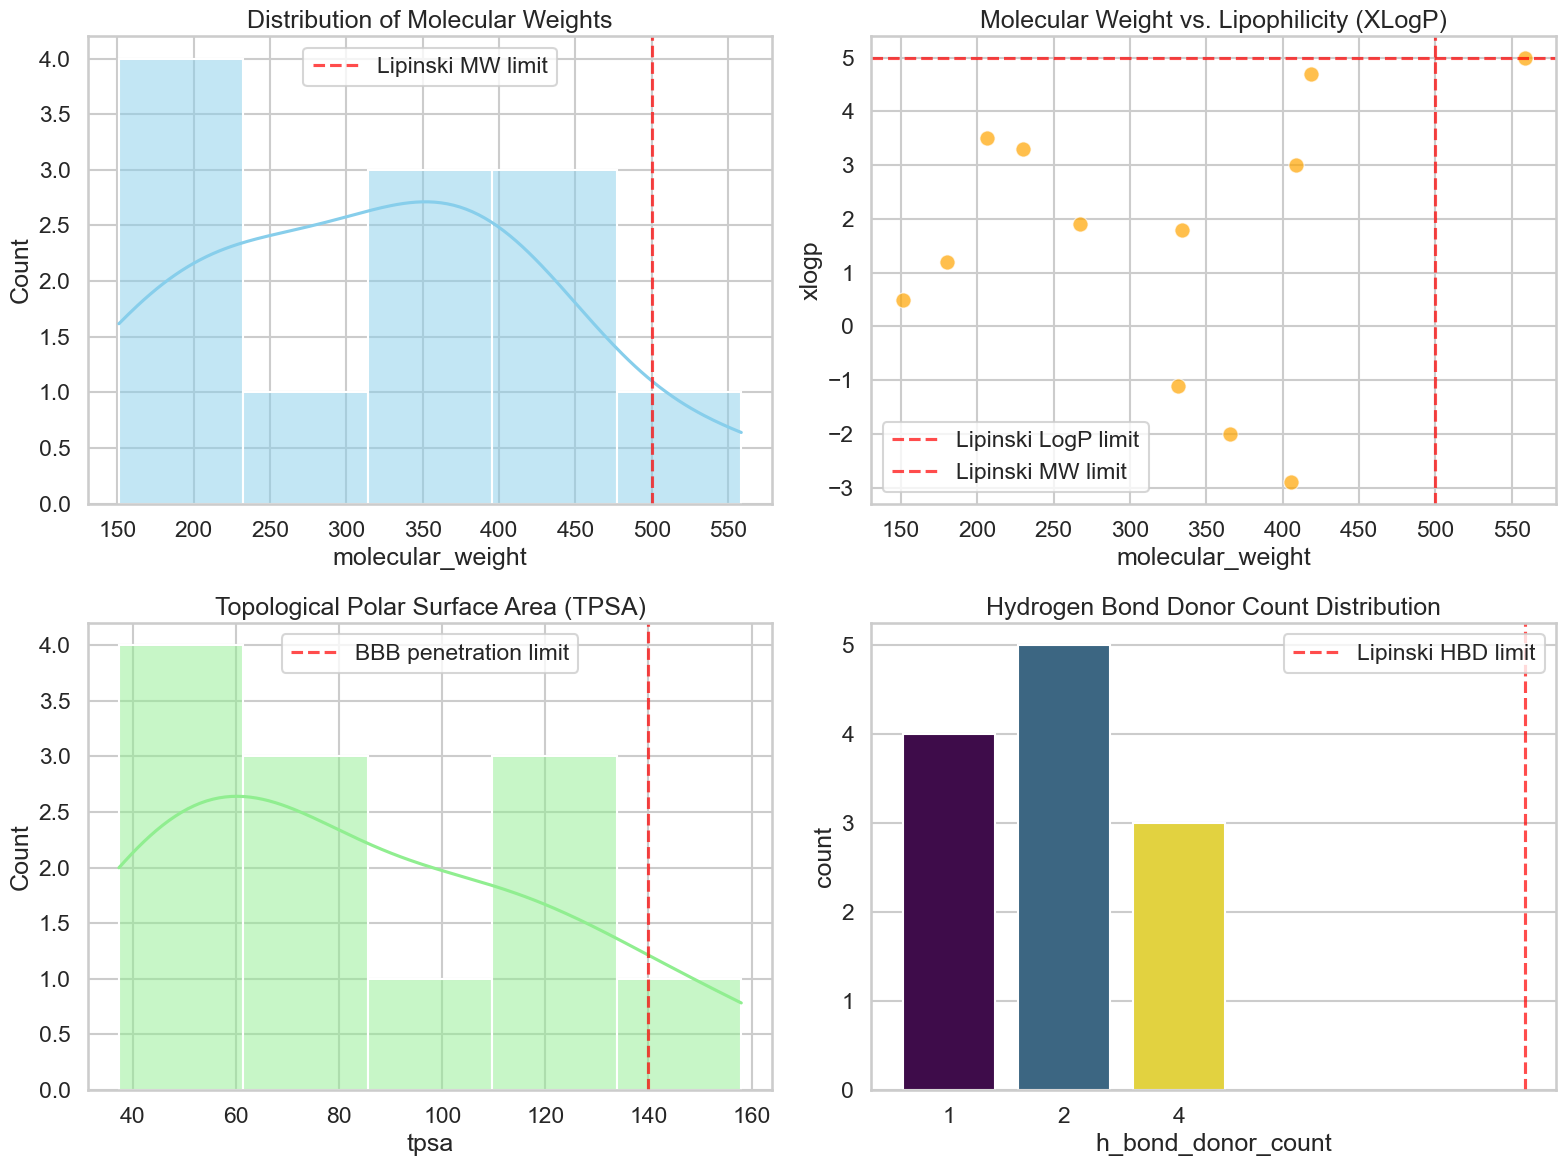

✅ Visualization complete! Red dashed lines show common drug-likeness thresholds.


In [8]:
# 1. Data cleaning and preparation
analysis_df = df_bulk[df_bulk['status'] == 'OK'].copy()
analysis_df['molecular_weight'] = pd.to_numeric(analysis_df['molecular_weight'], errors='coerce')
analysis_df['xlogp'] = pd.to_numeric(analysis_df['xlogp'], errors='coerce')
analysis_df['tpsa'] = pd.to_numeric(analysis_df['tpsa'], errors='coerce')
analysis_df['h_bond_donor_count'] = pd.to_numeric(analysis_df['h_bond_donor_count'], errors='coerce')

print(f"📊 Successfully prepared data for {len(analysis_df)} compounds")
print(f"   Available core properties: {len([col for col in analysis_df.columns if col not in ['input_identifier', 'cid', 'status']])}")

# 2. Calculate descriptive statistics for key drug discovery parameters
print("\n📈 Descriptive Statistics of Key Drug Properties:")
key_properties = ['molecular_weight', 'xlogp', 'tpsa', 'h_bond_donor_count']
display(analysis_df[key_properties].describe().round(2))

# 3. Enhanced visualization with more drug-relevant properties
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Molecular weight distribution
sns.histplot(analysis_df['molecular_weight'], kde=True, ax=ax1, color='skyblue')
ax1.set_title('Distribution of Molecular Weights')
ax1.axvline(x=500, color='red', linestyle='--', alpha=0.7, label='Lipinski MW limit')
ax1.legend()

# MW vs LogP (classic drug-likeness plot)
sns.scatterplot(data=analysis_df, x='molecular_weight', y='xlogp', s=120, ax=ax2, color='orange', alpha=0.7)
ax2.set_title('Molecular Weight vs. Lipophilicity (XLogP)')
ax2.axhline(y=5, color='red', linestyle='--', alpha=0.7, label='Lipinski LogP limit')
ax2.axvline(x=500, color='red', linestyle='--', alpha=0.7, label='Lipinski MW limit')
ax2.legend()

# TPSA distribution (important for BBB penetration)
sns.histplot(analysis_df['tpsa'], kde=True, ax=ax3, color='lightgreen')
ax3.set_title('Topological Polar Surface Area (TPSA)')
ax3.axvline(x=140, color='red', linestyle='--', alpha=0.7, label='BBB penetration limit')
ax3.legend()

# H-bond donors (Lipinski parameter)
sns.countplot(data=analysis_df, x='h_bond_donor_count', 
             hue='h_bond_donor_count', ax=ax4, palette='viridis', legend=False)
ax4.set_title('Hydrogen Bond Donor Count Distribution')
ax4.axvline(x=5, color='red', linestyle='--', alpha=0.7, label='Lipinski HBD limit')
ax4.legend()

plt.tight_layout()
plt.show()

print("✅ Visualization complete! Red dashed lines show common drug-likeness thresholds.")

## Advanced Applications: Solving Real-World Problems

This section showcases two advanced use cases, demonstrating the value of `ChemInformant` in practical research scenarios.

### Case 1: Drug-Likeness Assessment (Lipinski's Rule of Five)

🧬 Comprehensive Drug-likeness Analysis Results:
   ✅ Drug-like compounds: 12/12
   📊 Average violations: 0.1
   🎯 Good TPSA (≤140): 11/12


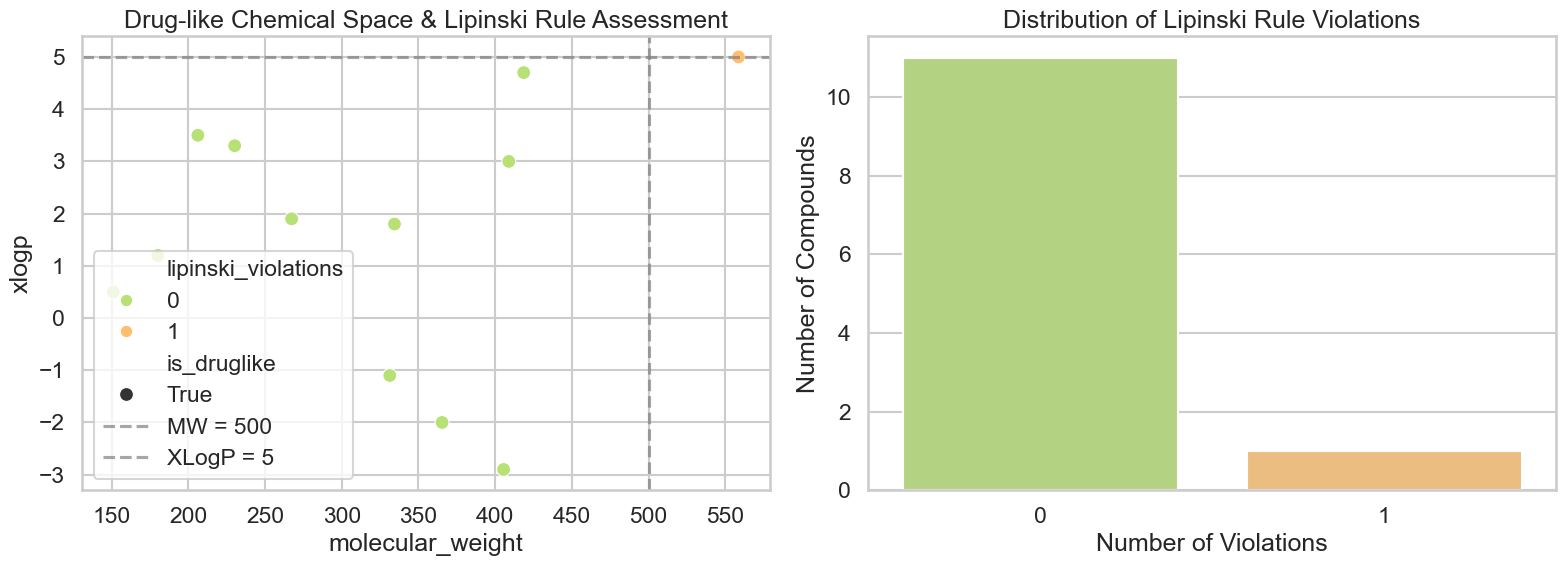

✅ Enhanced drug-likeness assessment complete!
💡 Green dots = drug-like, larger dots = passed overall assessment


In [9]:
# Enhanced Lipinski's Rule of Five assessment using available core properties
def check_lipinski_comprehensive(df):
    """
    Check Lipinski's Rule of Five using the comprehensive data we now have:
    - MW <= 500 Da
    - LogP <= 5
    - HBD <= 5 (Hydrogen bond donors)
    - HBA <= 10 (Hydrogen bond acceptors, we'll use available data)
    - Optional: TPSA <= 140 Ų (for better drug-likeness prediction)
    """
    # Core Lipinski rules
    mw_pass = df['molecular_weight'] <= 500
    logp_pass = df['xlogp'] <= 5
    hbd_pass = df['h_bond_donor_count'] <= 5
    
    # Try to use HBA if available
    if 'h_bond_acceptor_count' in df.columns:
        hba_pass = pd.to_numeric(df['h_bond_acceptor_count'], errors='coerce') <= 10
        df['lipinski_violations'] = (~mw_pass).astype(int) + (~logp_pass).astype(int) + (~hbd_pass).astype(int) + (~hba_pass).astype(int)
        df['is_druglike'] = df['lipinski_violations'] <= 1  # Allow 1 violation
    else:
        df['lipinski_violations'] = (~mw_pass).astype(int) + (~logp_pass).astype(int) + (~hbd_pass).astype(int)
        df['is_druglike'] = df['lipinski_violations'] == 0  # No violations for partial rule
    
    # Additional TPSA check if available
    if 'tpsa' in df.columns:
        tpsa_pass = df['tpsa'] <= 140
        df['has_good_tpsa'] = tpsa_pass
    
    return df

analysis_df = check_lipinski_comprehensive(analysis_df)

print(f"🧬 Comprehensive Drug-likeness Analysis Results:")
print(f"   ✅ Drug-like compounds: {analysis_df['is_druglike'].sum()}/{len(analysis_df)}")
print(f"   📊 Average violations: {analysis_df['lipinski_violations'].mean():.1f}")

if 'has_good_tpsa' in analysis_df.columns:
    print(f"   🎯 Good TPSA (≤140): {analysis_df['has_good_tpsa'].sum()}/{len(analysis_df)}")

# Enhanced visualization with violation counts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Main drug-likeness plot
sns.scatterplot(data=analysis_df, x='molecular_weight', y='xlogp', 
                hue='lipinski_violations', size='is_druglike',
                sizes=(100, 200), palette='RdYlGn_r', ax=ax1)
ax1.axvline(x=500, color='grey', linestyle='--', alpha=0.7, label='MW = 500')
ax1.axhline(y=5, color='grey', linestyle='--', alpha=0.7, label='XLogP = 5')
ax1.set_title('Drug-like Chemical Space & Lipinski Rule Assessment')
ax1.legend()

# Violation distribution
violation_counts = analysis_df['lipinski_violations'].value_counts().sort_index()
sns.barplot(x=violation_counts.index, y=violation_counts.values, 
           hue=violation_counts.index, palette='RdYlGn_r', ax=ax2, legend=False)
ax2.set_title('Distribution of Lipinski Rule Violations')
ax2.set_xlabel('Number of Violations')
ax2.set_ylabel('Number of Compounds')

plt.tight_layout()
plt.show()

print("✅ Enhanced drug-likeness assessment complete!")
print("💡 Green dots = drug-like, larger dots = passed overall assessment")

### Case 2: Clustering Similar Drugs with Machine Learning

🔬 Clustering analysis using 4 properties:
   Features: molecular_weight, xlogp, tpsa, h_bond_donor_count
   Compounds with complete data: 12


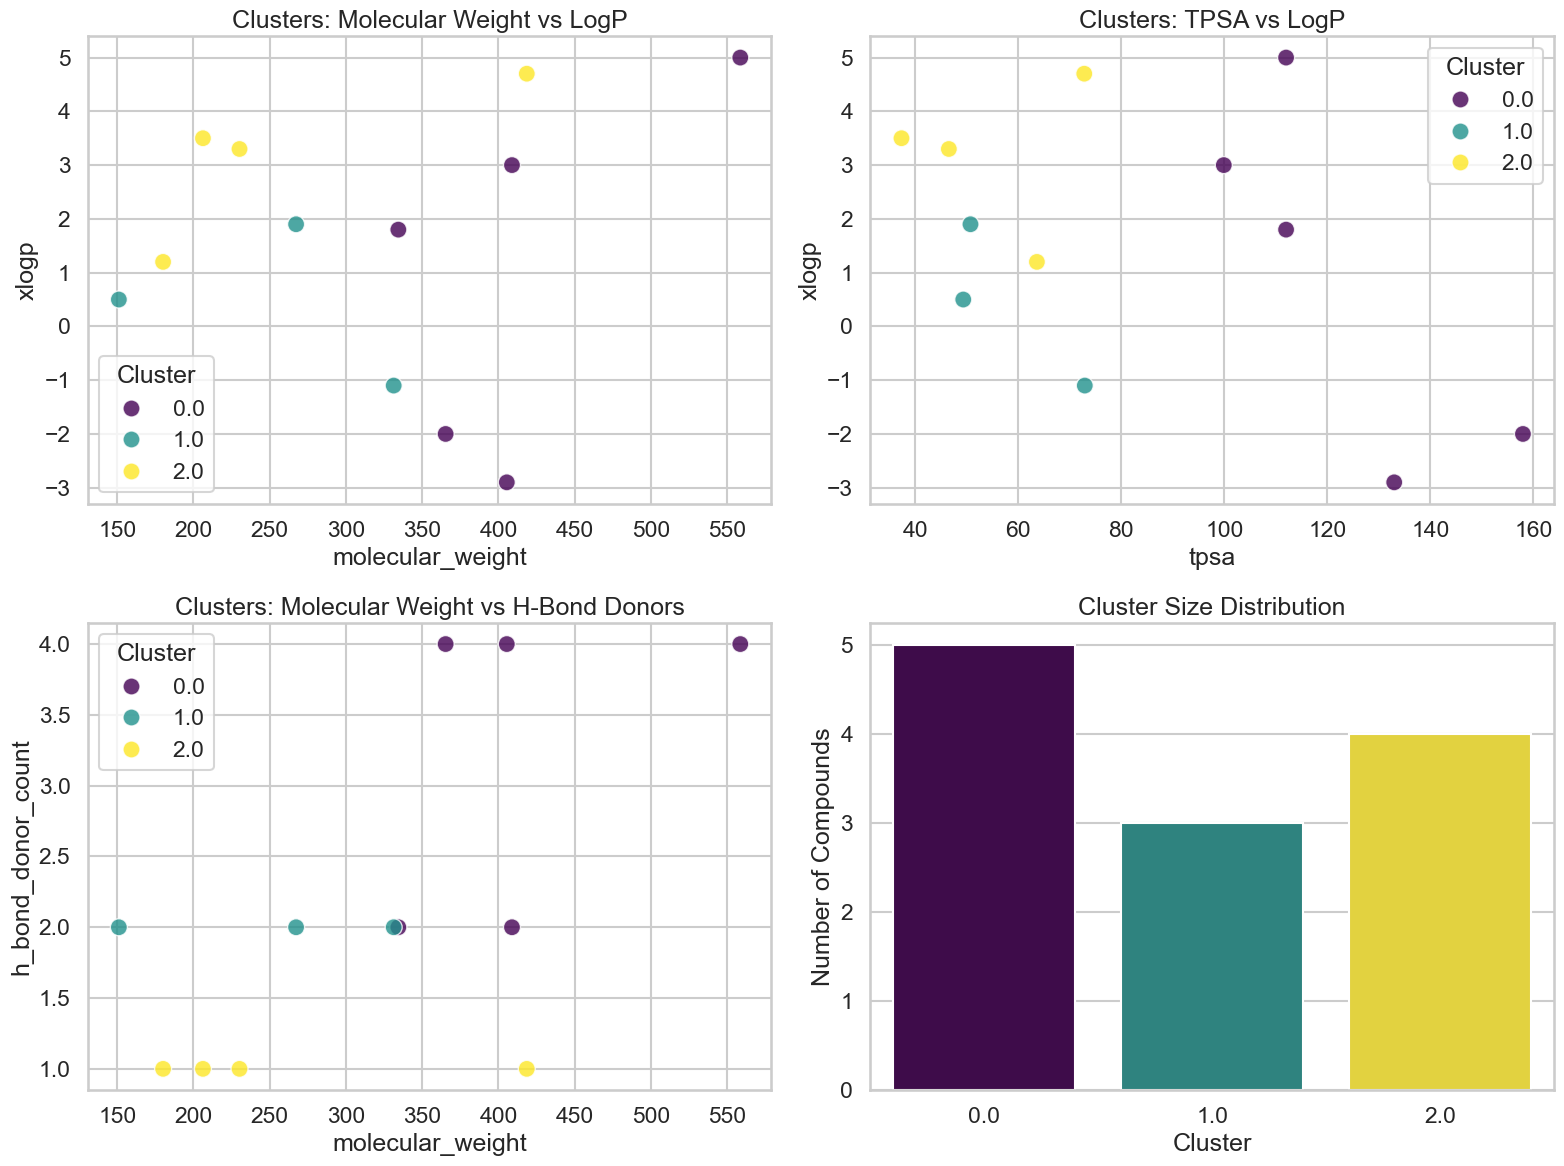


📊 Cluster Analysis Results:

🔸 Cluster 0 (5 compounds):
   Compounds: penicillin, amoxicillin, lisinopril, amlodipine, atorvastatin
   Avg molecular_weight: 414.56
   Avg xlogp: 0.98
   Avg tpsa: 122.98
   Avg h_bond_donor_count: 3.20

🔸 Cluster 1 (3 compounds):
   Compounds: paracetamol, ciprofloxacin, metoprolol
   Avg molecular_weight: 249.95
   Avg xlogp: 0.43
   Avg tpsa: 57.63
   Avg h_bond_donor_count: 2.00

🔸 Cluster 2 (4 compounds):
   Compounds: aspirin, ibuprofen, naproxen, simvastatin
   Avg molecular_weight: 258.83
   Avg xlogp: 3.17
   Avg tpsa: 55.05
   Avg h_bond_donor_count: 1.00

✅ Multi-dimensional clustering analysis complete!
💡 Clusters reveal different drug classes based on physicochemical properties


In [10]:
# 1. Prepare enhanced features for clustering using multiple physicochemical properties
available_features = ['molecular_weight', 'xlogp', 'tpsa', 'h_bond_donor_count']
# Only use features that are available and have data
feature_columns = [col for col in available_features if col in analysis_df.columns]
features_df = analysis_df[feature_columns].dropna()

print(f"🔬 Clustering analysis using {len(feature_columns)} properties:")
print(f"   Features: {', '.join(feature_columns)}")
print(f"   Compounds with complete data: {len(features_df)}")

# Scale features for clustering
features_scaled = StandardScaler().fit_transform(features_df)

# 2. Perform K-Means clustering (finding 3 clusters based on drug classes)
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(features_scaled)

# Add cluster labels back to the dataframe
analysis_df.loc[features_df.index, 'cluster'] = cluster_labels

# 3. Enhanced visualization with multiple views
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Traditional MW vs LogP plot
scatter1 = sns.scatterplot(data=analysis_df, x='molecular_weight', y='xlogp', 
                          hue='cluster', palette='viridis', s=150, ax=ax1, alpha=0.8)
ax1.set_title('Clusters: Molecular Weight vs LogP')
ax1.legend(title='Cluster')

# TPSA vs LogP (if TPSA is available)
if 'tpsa' in analysis_df.columns:
    scatter2 = sns.scatterplot(data=analysis_df, x='tpsa', y='xlogp', 
                              hue='cluster', palette='viridis', s=150, ax=ax2, alpha=0.8)
    ax2.set_title('Clusters: TPSA vs LogP')
    ax2.legend(title='Cluster')
else:
    ax2.text(0.5, 0.5, 'TPSA data not available', ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title('TPSA Analysis (Not Available)')

# Molecular weight vs H-bond donors
scatter3 = sns.scatterplot(data=analysis_df, x='molecular_weight', y='h_bond_donor_count', 
                          hue='cluster', palette='viridis', s=150, ax=ax3, alpha=0.8)
ax3.set_title('Clusters: Molecular Weight vs H-Bond Donors')
ax3.legend(title='Cluster')

# Cluster composition
cluster_counts = analysis_df['cluster'].value_counts().sort_index()
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, 
           hue=cluster_counts.index, palette='viridis', ax=ax4, legend=False)
ax4.set_title('Cluster Size Distribution')
ax4.set_xlabel('Cluster')
ax4.set_ylabel('Number of Compounds')

plt.tight_layout()
plt.show()

# 4. Analyze cluster characteristics
print("\n📊 Cluster Analysis Results:")
for cluster_id in sorted(analysis_df['cluster'].dropna().unique()):
    cluster_data = analysis_df[analysis_df['cluster'] == cluster_id]
    print(f"\n🔸 Cluster {int(cluster_id)} ({len(cluster_data)} compounds):")
    print(f"   Compounds: {', '.join(cluster_data['input_identifier'].tolist())}")
    
    # Show average properties for this cluster
    for feature in feature_columns:
        avg_val = cluster_data[feature].mean()
        print(f"   Avg {feature}: {avg_val:.2f}")

print("\n✅ Multi-dimensional clustering analysis complete!")
print("💡 Clusters reveal different drug classes based on physicochemical properties")

## Data Export: Sharing Your Results

Finally, all data retrieved and processed with `ChemInformant` can be easily exported into various common formats.

In [11]:
from datetime import datetime

# 1. Export to a CSV file
csv_filename = f"drug_properties_{datetime.now().strftime('%Y%m%d')}.csv"
analysis_df.to_csv(csv_filename, index=False)
print(f"✓ Data successfully saved to: {csv_filename}")

# 2. Export to an Excel file (with multiple sheets)
with pd.ExcelWriter('drug_analysis.xlsx') as writer:
    analysis_df.to_excel(writer, sheet_name='Raw Data', index=False)
    analysis_df[['molecular_weight', 'xlogp']].describe().to_excel(writer, sheet_name='Summary Stats')
print("✓ Excel file successfully created with 'Raw Data' and 'Summary Stats' sheets.")

# 3. Prepare a SMILES file for other cheminformatics tools
smiles_df = analysis_df[['canonical_smiles', 'input_identifier']].dropna()
smiles_df.to_csv('compounds_smiles.smi', sep='\t', index=False, header=False)
print(f"✓ SMILES file (compounds_smiles.smi) successfully created with {len(smiles_df)} compounds.")

✓ Data successfully saved to: drug_properties_20250731.csv
✓ Excel file successfully created with 'Raw Data' and 'Summary Stats' sheets.
✓ SMILES file (compounds_smiles.smi) successfully created with 12 compounds.


---

## Further Information

This manual has demonstrated how `ChemInformant` can be a powerful and reliable tool in your cheminformatics toolbox. We encourage you to explore its features further and connect with us through the following channels:

- **Project Homepage & Source Code:** [https://github.com/HzaCode/ChemInformant](https://github.com/HzaCode/ChemInformant)
- **Bugs & Feature Requests:** [GitHub Issues](https://github.com/HzaCode/ChemInformant/issues)
